In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

In [7]:
# Load data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [8]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

# Data Preparation

# EDA Process

In [9]:
# Check null values
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [10]:
# Check wins vs loss 
print("Percent of games that are a win:",df['blueWins'].mean())

Percent of games that are a win: 0.4990383642069035


In [11]:
# Look at mean, median mode std for values 
df.mean()

gameId                          4.500084e+09
blueWins                        4.990384e-01
blueWardsPlaced                 2.228829e+01
blueWardsDestroyed              2.824881e+00
blueFirstBlood                  5.048082e-01
blueKills                       6.183925e+00
blueDeaths                      6.137666e+00
blueAssists                     6.645106e+00
blueEliteMonsters               5.499544e-01
blueDragons                     3.619800e-01
blueHeralds                     1.879745e-01
blueTowersDestroyed             5.142221e-02
blueTotalGold                   1.650346e+04
blueAvgLevel                    6.916004e+00
blueTotalExperience             1.792811e+04
blueTotalMinionsKilled          2.166996e+02
blueTotalJungleMinionsKilled    5.050967e+01
blueGoldDiff                    1.441411e+01
blueExperienceDiff             -3.362031e+01
blueCSPerMin                    2.166996e+01
blueGoldPerMin                  1.650346e+03
redWardsPlaced                  2.236795e+01
redWardsDe

In [12]:
df.median()

gameId                          4.510920e+09
blueWins                        0.000000e+00
blueWardsPlaced                 1.600000e+01
blueWardsDestroyed              3.000000e+00
blueFirstBlood                  1.000000e+00
blueKills                       6.000000e+00
blueDeaths                      6.000000e+00
blueAssists                     6.000000e+00
blueEliteMonsters               0.000000e+00
blueDragons                     0.000000e+00
blueHeralds                     0.000000e+00
blueTowersDestroyed             0.000000e+00
blueTotalGold                   1.639800e+04
blueAvgLevel                    7.000000e+00
blueTotalExperience             1.795100e+04
blueTotalMinionsKilled          2.180000e+02
blueTotalJungleMinionsKilled    5.000000e+01
blueGoldDiff                    1.400000e+01
blueExperienceDiff             -2.800000e+01
blueCSPerMin                    2.180000e+01
blueGoldPerMin                  1.639800e+03
redWardsPlaced                  1.600000e+01
redWardsDe

In [13]:
df.mode(axis=0).iloc[:1]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4295358071,0.0,16.0,2.0,1.0,6.0,5.0,5.0,0.0,0.0,...,0.0,16074.0,7.0,17842.0,215.0,52.0,-428.0,-63.0,21.5,1607.4


In [14]:
df.std()

gameId                          2.757328e+07
blueWins                        5.000244e-01
blueWardsPlaced                 1.801918e+01
blueWardsDestroyed              2.174998e+00
blueFirstBlood                  5.000022e-01
blueKills                       3.011028e+00
blueDeaths                      2.933818e+00
blueAssists                     4.064520e+00
blueEliteMonsters               6.255265e-01
blueDragons                     4.805974e-01
blueHeralds                     3.907116e-01
blueTowersDestroyed             2.443692e-01
blueTotalGold                   1.535447e+03
blueAvgLevel                    3.051458e-01
blueTotalExperience             1.200524e+03
blueTotalMinionsKilled          2.185844e+01
blueTotalJungleMinionsKilled    9.898282e+00
blueGoldDiff                    2.453349e+03
blueExperienceDiff              1.920370e+03
blueCSPerMin                    2.185844e+00
blueGoldPerMin                  1.535447e+02
redWardsPlaced                  1.845743e+01
redWardsDe

In [15]:
# Number of samples
len(df)

9879

There is an adequate number of samples. Furthermore, the wins and losses are almost 50 - 50 so we don't need to wory about class imbalance.

In [16]:
# Make a heat map
corr = df.corr()
plt.figure(figsize = (100,80))
corr.style.background_gradient(cmap ='coolwarm')

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

<Figure size 10000x8000 with 0 Axes>

<Axes: >

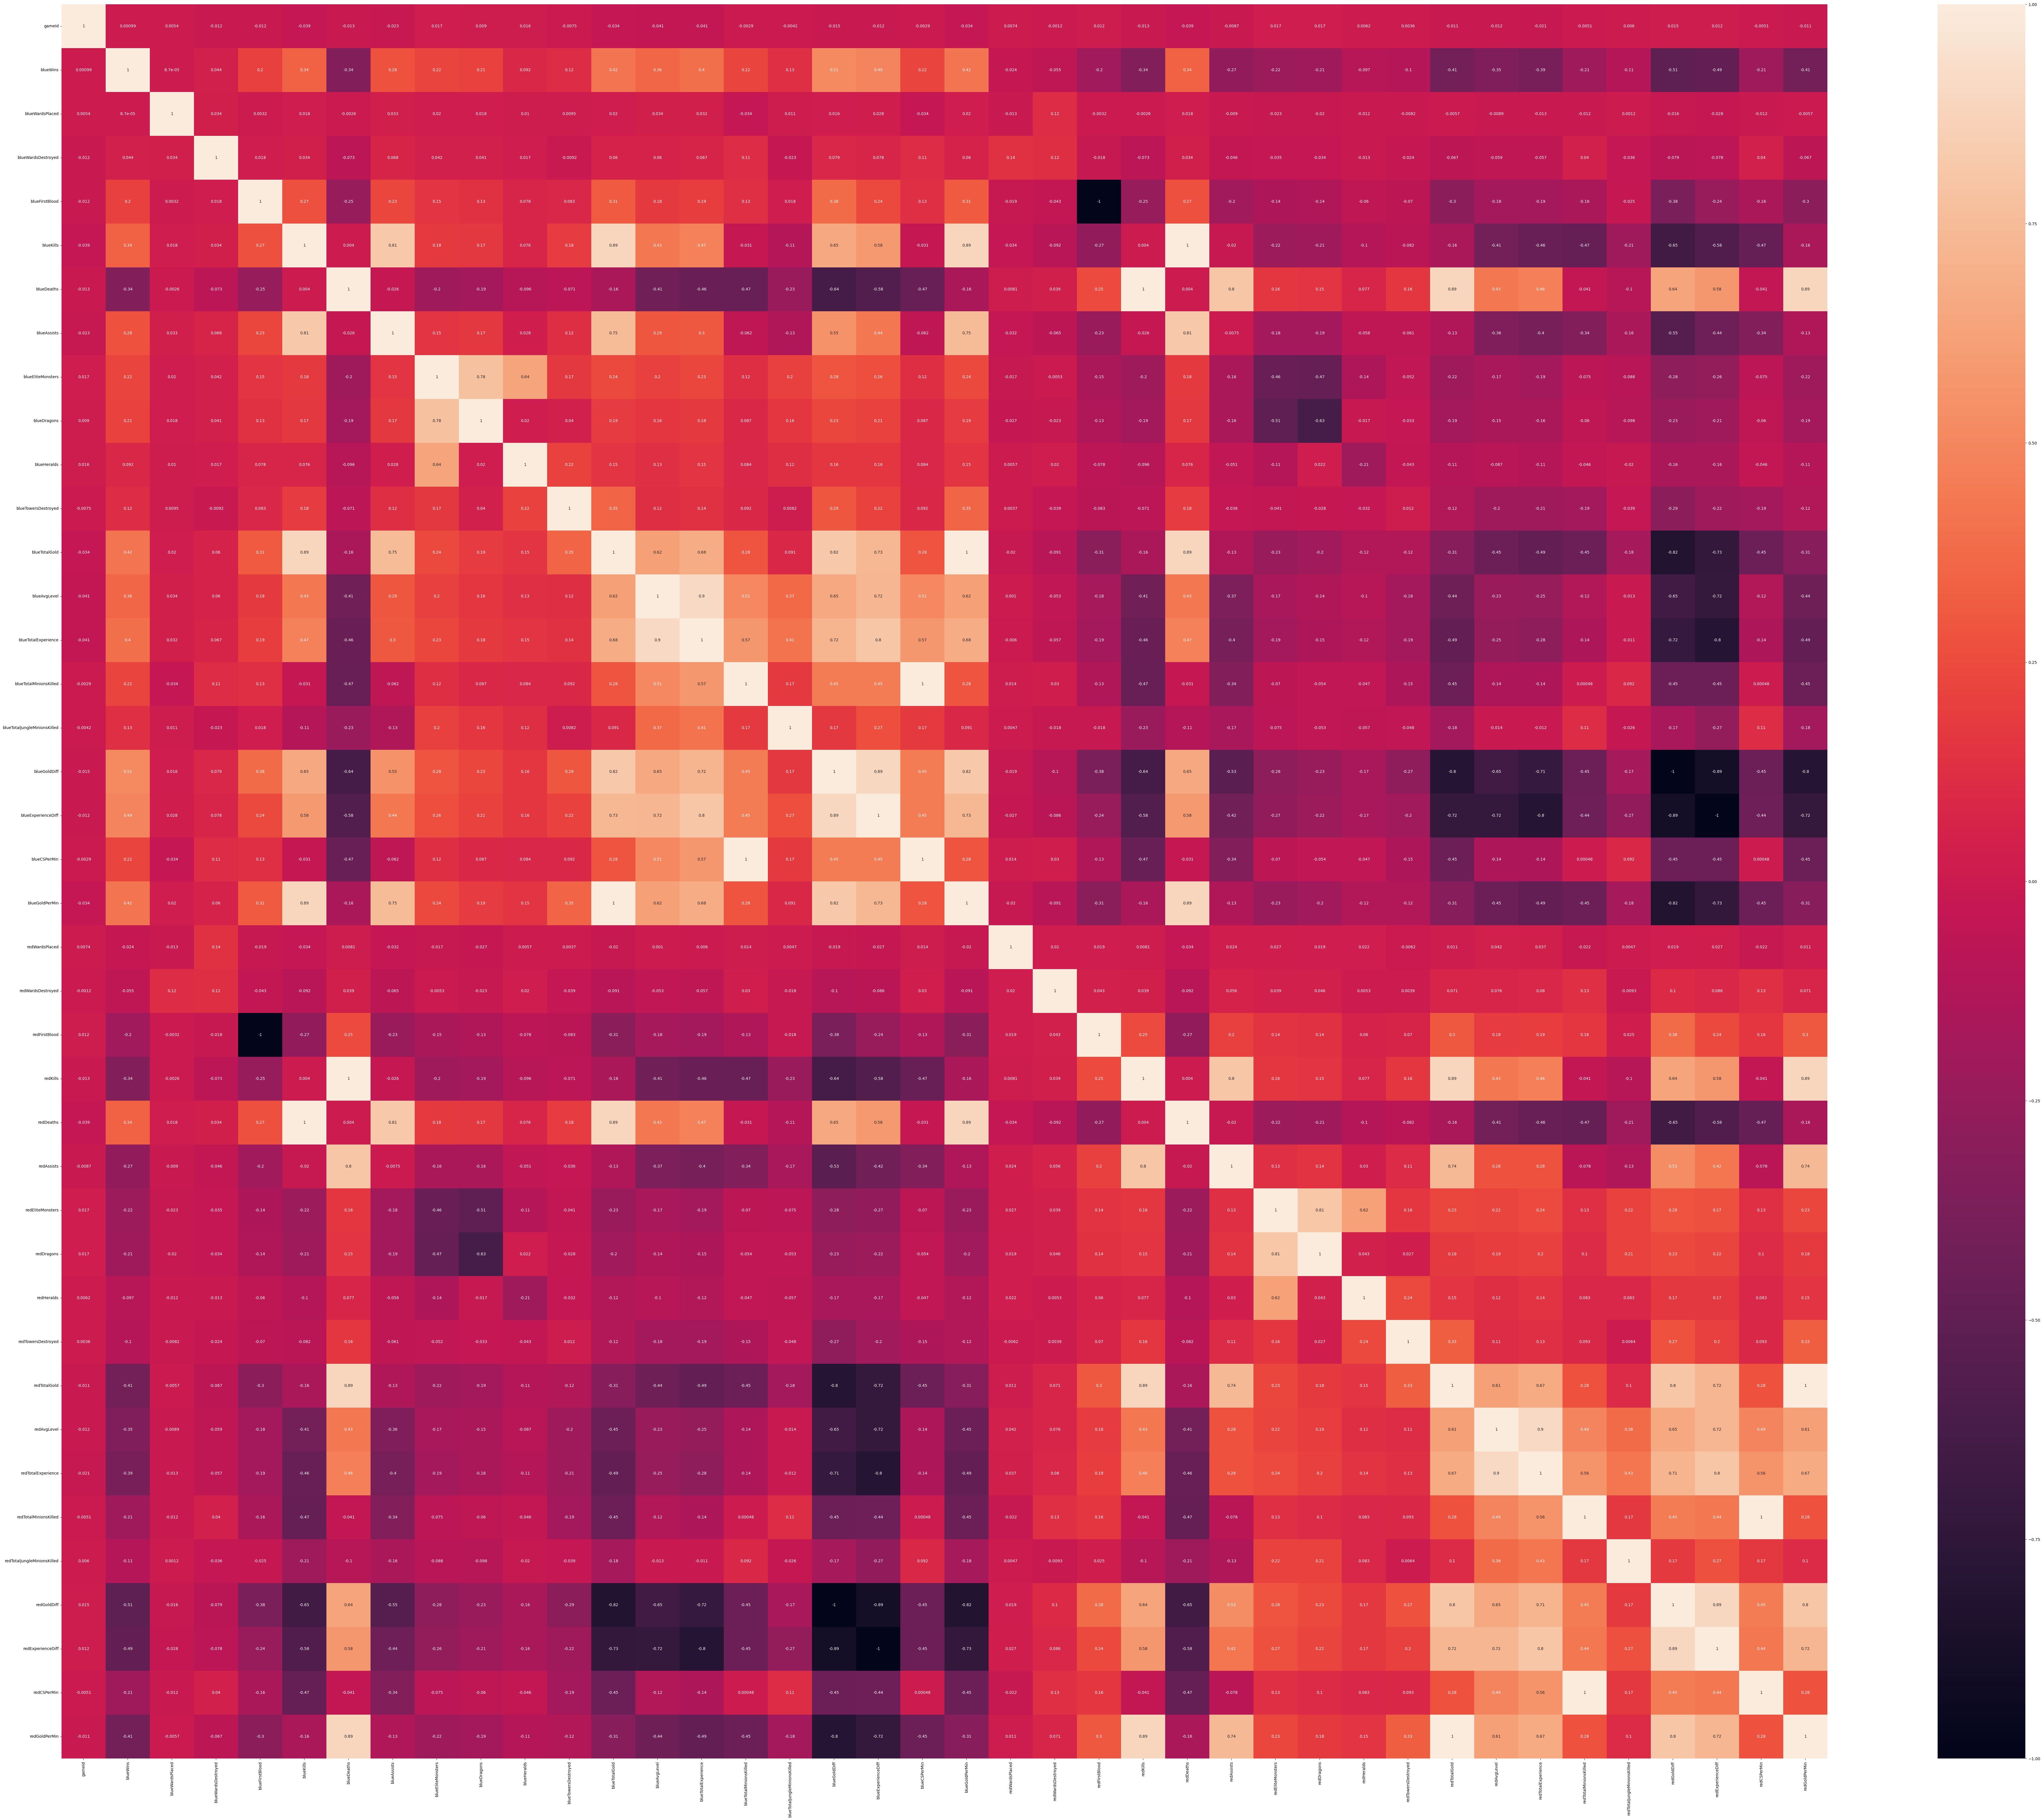

In [17]:
# Second heat map same data but different color and style
plt.figure(figsize = (100,80))
sns.heatmap(corr, annot = True)

In [18]:
# Correlation with blueWins
corr['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

In [19]:
# Observe the average for each feature based on winning team 
df_blue_won = df[df['blueWins'] == 1]
df_red_won = df[df['blueWins'] == 0]

In [20]:
# Difference between averages for when blue wins vs any game in general
df_blue_won.mean() - df.mean()

gameId                          27214.119987
blueWins                            0.500962
blueWardsPlaced                     0.001570
blueWardsDestroyed                  0.096417
blueFirstBlood                      0.101074
blueKills                           1.017697
blueDeaths                         -0.997301
blueAssists                         1.126699
blueEliteMonsters                   0.139092
blueDragons                         0.102929
blueHeralds                         0.036163
blueTowersDestroyed                 0.028294
blueTotalGold                     641.808383
blueAvgLevel                        0.109392
blueTotalExperience               476.467758
blueTotalMinionsKilled              4.925385
blueTotalJungleMinionsKilled        1.303518
blueGoldDiff                     1256.303942
blueExperienceDiff                941.894748
blueCSPerMin                        0.492538
blueGoldPerMin                     64.180838
redWardsPlaced                     -0.437729
redWardsDe

In [21]:
# Difference between averages for when red wins vs any game in general
df_red_won.mean() - df.mean()

gameId                         -27109.640640
blueWins                           -0.499038
blueWardsPlaced                    -0.001564
blueWardsDestroyed                 -0.096047
blueFirstBlood                     -0.100686
blueKills                          -1.013790
blueDeaths                          0.993472
blueAssists                        -1.122374
blueEliteMonsters                  -0.138558
blueDragons                        -0.102534
blueHeralds                        -0.036025
blueTowersDestroyed                -0.028185
blueTotalGold                    -639.344378
blueAvgLevel                       -0.108972
blueTotalExperience              -474.638522
blueTotalMinionsKilled             -4.906475
blueTotalJungleMinionsKilled       -1.298513
blueGoldDiff                    -1251.480791
blueExperienceDiff               -938.278664
blueCSPerMin                       -0.490648
blueGoldPerMin                    -63.934438
redWardsPlaced                      0.436049
redWardsDe

<Axes: title={'center': 'Blue Won'}>

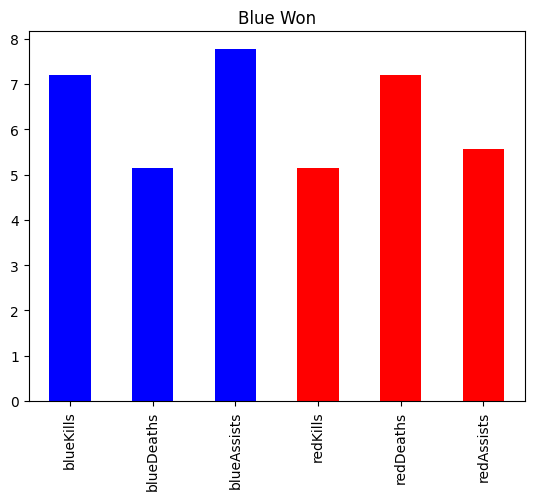

In [22]:
# Blue won
plt.title("Blue Won")
df_blue_won[['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']].mean().plot(kind='bar',color=['b','b','b','r','r','r'])

<Axes: title={'center': 'Red Won'}>

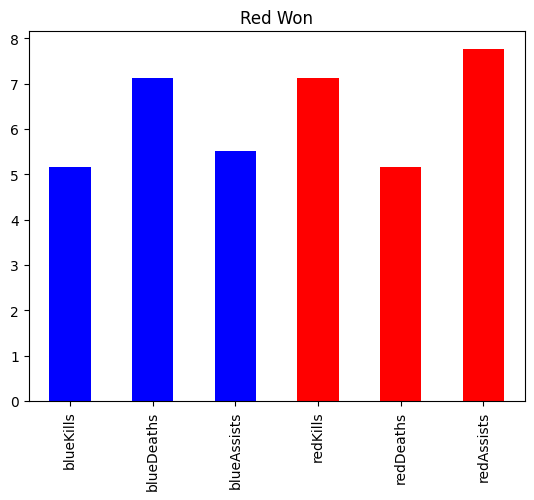

In [23]:
# Red won
plt.title("Red Won")

df_red_won[['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']].mean().plot(kind='bar',color=['b','b','b','r','r','r'])

<Axes: title={'center': 'Blue Won'}>

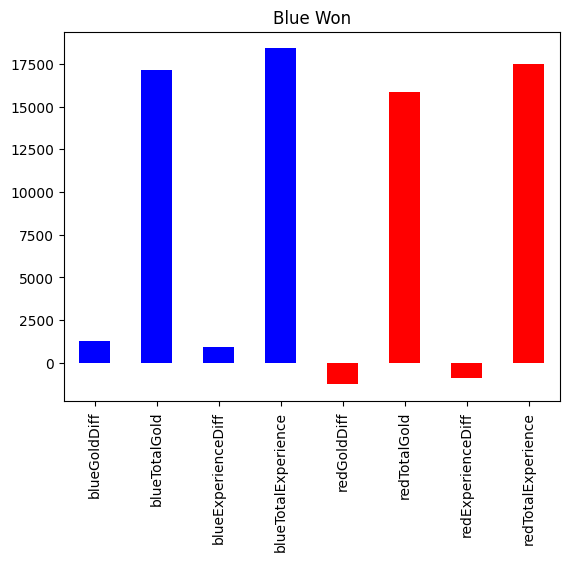

In [24]:
#blue won
plt.title("Blue Won")
df_blue_won[['blueGoldDiff','blueTotalGold','blueExperienceDiff','blueTotalExperience','redGoldDiff','redTotalGold','redExperienceDiff','redTotalExperience']].mean().plot(kind='bar',color=['b','b','b','b','r','r','r','r'])

<Axes: title={'center': 'Red Won'}>

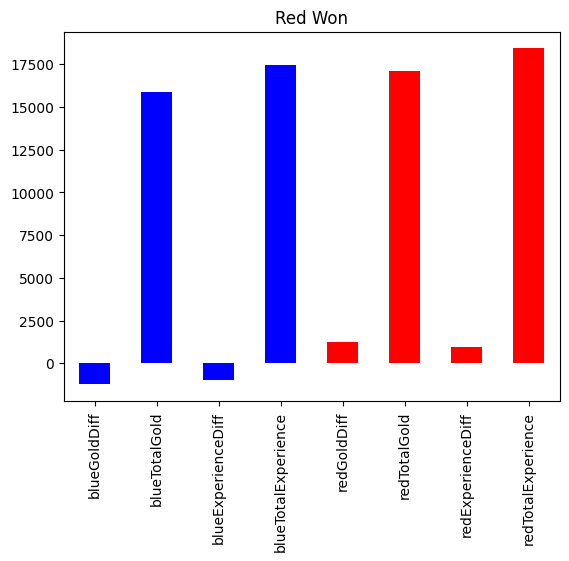

In [25]:
# Red won
plt.title("Red Won")
df_red_won[['blueGoldDiff','blueTotalGold','blueExperienceDiff','blueTotalExperience','redGoldDiff','redTotalGold','redExperienceDiff','redTotalExperience']].mean().plot(kind='bar',color=['b','b','b','b','r','r','r','r'])

In [26]:
df['blueDragons'].max()

np.int64(1)

In [27]:
# Drop gameId column (this is an identifier for each match -- not useful for our model)
df.drop('gameId', axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [28]:
# Create df with our selected features
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redDragons', 
                'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67


In [29]:
# Drop the features that are duplicates of each other
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

/var/folders/mh/fxqngtrx5t99493pfstpfm4h0000gn/T/ipykernel_58625/2677585875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'],


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

In [30]:
# Test train split
X = df_select.drop('blueWins', axis=1)
y = df_select['blueWins']

# Scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Baseline Model: Linear Regression

Using Linear regression model to solve a classification problem might be very difficult. Part of the reason is that we do not have a very well defined metrics to test its performance. Given a classification problem with output of either 1 or 0, linear regression model would provide a test result that is either close to 1 or to 0, not exactly 1 or 0 as expected.

In [31]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.1845
R² Score: 0.2619


We can use a simple decision rule: set 0.5 as a threshold. We will test this again. We can see that the result is fine. However, would using other method that is designed to handle classificationm problem handle this task better?

In [33]:
# Transform predictions: values > 0.5 -> 1, else -> 0
y_pred_transformed = (y_pred > 0.5).astype(int)

# Evaluate the transformed predictions
mse = mean_squared_error(y_test, y_pred_transformed)
r2 = r2_score(y_test, y_pred_transformed)
accuracy = accuracy_score(y_test, y_pred_transformed)
classification_rep = classification_report(y_test, y_pred_transformed)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Mean Squared Error (MSE): 0.2769089236430543
R² Score: -0.10765329766393483
Accuracy: 0.7230910763569457

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.73      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



As learned in class, we can try a ridge regression to see if the result is better.

In [35]:
# Define the Ridge Regression model
ridge_model = Ridge()

# Define a range of values for alpha (regularization strength)
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value from GridSearchCV
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Ridge model with the best alpha value
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_ridge = best_ridge_model.predict(X_test)

# Transform predictions: values > 0.5 -> 1, else -> 0
y_pred_best_ridge_transformed = (y_pred_best_ridge > 0.5).astype(int)

# Evaluate the transformed predictions
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge_transformed)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge_transformed)
accuracy_best_ridge = accuracy_score(y_test, y_pred_best_ridge_transformed)
classification_rep_best_ridge = classification_report(y_test, y_pred_best_ridge_transformed)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse_best_ridge}")
print(f"R² Score: {r2_best_ridge}")
print(f"Accuracy: {accuracy_best_ridge}")
print("\nClassification Report:")
print(classification_rep_best_ridge)

Best alpha: 100.0
Mean Squared Error (MSE): 0.27936215884697946
R² Score: -0.1174663944317218
Accuracy: 0.7206378411530205

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.72      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



We can also do a lasso regression, to see if lasso regression would have a better result.

In [38]:
# Initialize the Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values for GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform GridSearchCV to find the best alpha
grid_search_lasso = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best alpha value and best model
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_lasso_model = grid_search_lasso.best_estimator_
print(f"Best Alpha for Lasso Regression: {best_alpha_lasso}")

# Make predictions on the test set
y_pred_lasso = best_lasso_model.predict(X_test)

# Transform predictions: values > 0.5 -> 1, else -> 0
y_pred_lasso_transformed = (y_pred_lasso > 0.5).astype(int)

# Evaluate the Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso_transformed)
r2_lasso = r2_score(y_test, y_pred_lasso_transformed)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_transformed)
classification_rep_lasso = classification_report(y_test, y_pred_lasso_transformed)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R² Score: {r2_lasso}")
print(f"Accuracy: {accuracy_lasso}")
print("\nClassification Report:")
print(classification_rep_lasso)

Best Alpha for Lasso Regression: 0.01
Mean Squared Error (MSE): 0.2778288868445262
R² Score: -0.11133320895185506
Accuracy: 0.7221711131554738

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.73      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



We have got the performance of linear regression. Because linear regression might not be a good model for classification task, we will look into some models that are known for their ability to solve classification problem.

# Logistic Regression

In [118]:
# # Test train split
# X = df_select.drop('blueWins', axis=1)
# y = df_select['blueWins']

# # Scale the data
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
# Train and test a simple logistical regression model to get a baseline 
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.73      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



# GridSearch CV - Logistic Regression

In [120]:
# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False],'penalty': ['l1', 'l2'], 
              'max_iter': [500], 'solver': ['liblinear']}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [121]:
# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.01, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.7212152870547346


In [122]:
print("Test score: ", grid_search.score(X_test, y_test))

Test score:  0.7221711131554738


In [123]:
log_reg = LogisticRegression(C=0.01,fit_intercept=True,max_iter=500,penalty='l1',solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1624
           1       0.72      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



# Logistic Regression: Feature Importance

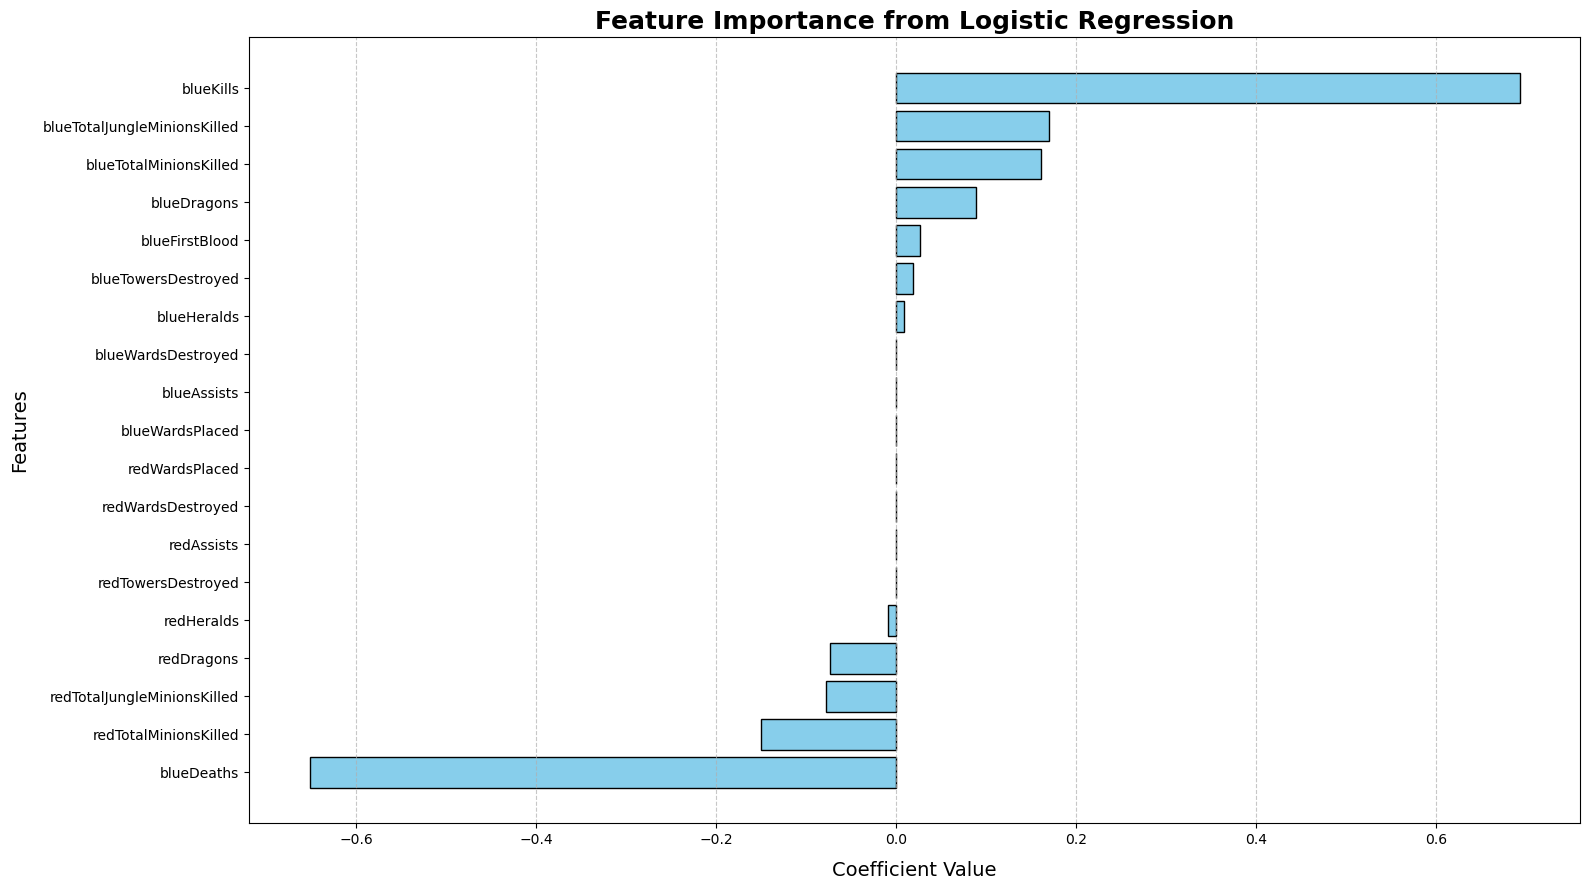

In [124]:
coefs = log_reg.coef_[0]
columns = df_select.drop('blueWins', axis=1).columns
indices = np.argsort(coefs)
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(columns[indices], coefs[indices], color="skyblue", edgecolor="black")
ax.set_title("Feature Importance from Logistic Regression", fontsize=18, weight="bold")
ax.set_xlabel("Coefficient Value", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)
ax.grid(axis="x", linestyle="--", alpha=0.7)
fig.tight_layout()

# Show the plot
plt.show()

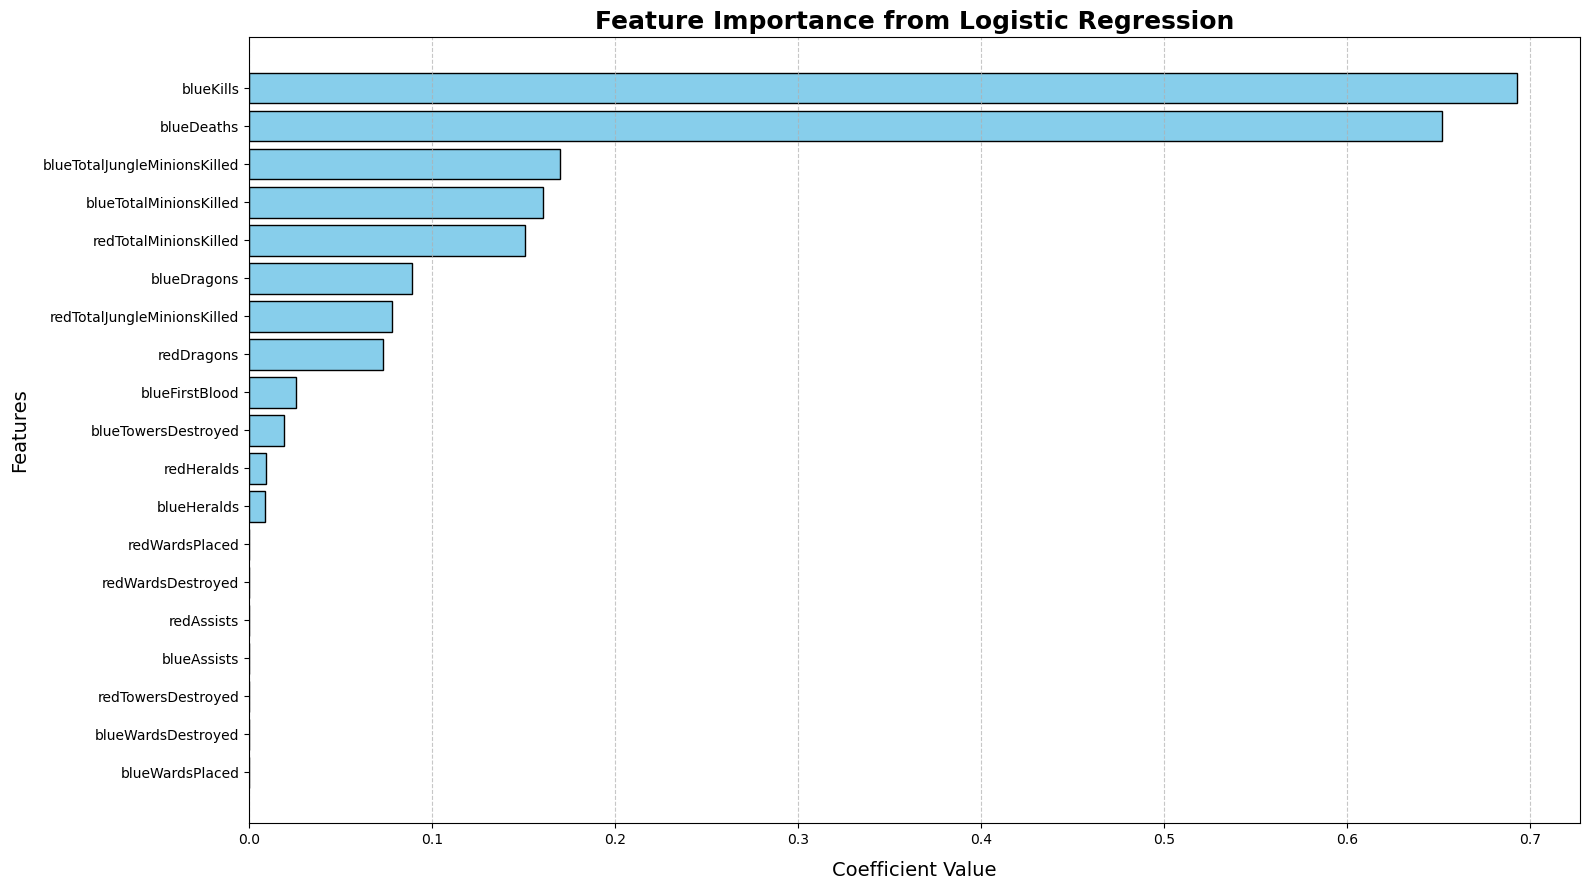

In [125]:
coefs_abs = np.abs(coefs)
indices_abs = np.argsort(coefs_abs)
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(columns[indices_abs], coefs_abs[indices_abs], color="skyblue", edgecolor="black")
ax.set_title("Feature Importance from Logistic Regression", fontsize=18, weight="bold")
ax.set_xlabel("Coefficient Value", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)
ax.grid(axis="x", linestyle="--", alpha=0.7)
fig.tight_layout()

# Show the plot
plt.show()

# Cross Validation

In [126]:
# CV scores
kf = KFold(n_splits=5, shuffle=True, random_state=48)
scores = cross_val_score(log_reg, X, y, cv=kf)
scores

array([0.71204453, 0.73633603, 0.7034413 , 0.72469636, 0.73113924])

In [127]:
# Mean CV scores
scores.mean()

0.7215314918259622

# Logistic Regression: ROC

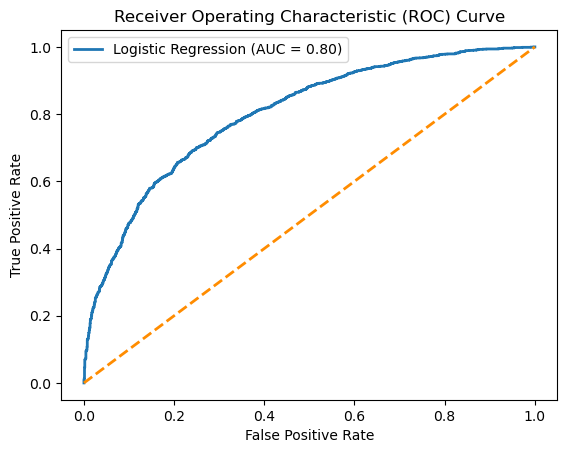

In [128]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")
plt.show()

# XGBoost: Random Forest

In [129]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6982520699172033
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1624
           1       0.70      0.69      0.70      1637

    accuracy                           0.70      3261
   macro avg       0.70      0.70      0.70      3261
weighted avg       0.70      0.70      0.70      3261



c:\Users\Junbo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# GridSearch CV - XGBoost: Random Forest

In [130]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


c:\Users\Junbo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# XGBoost Random Forest Feature Importance

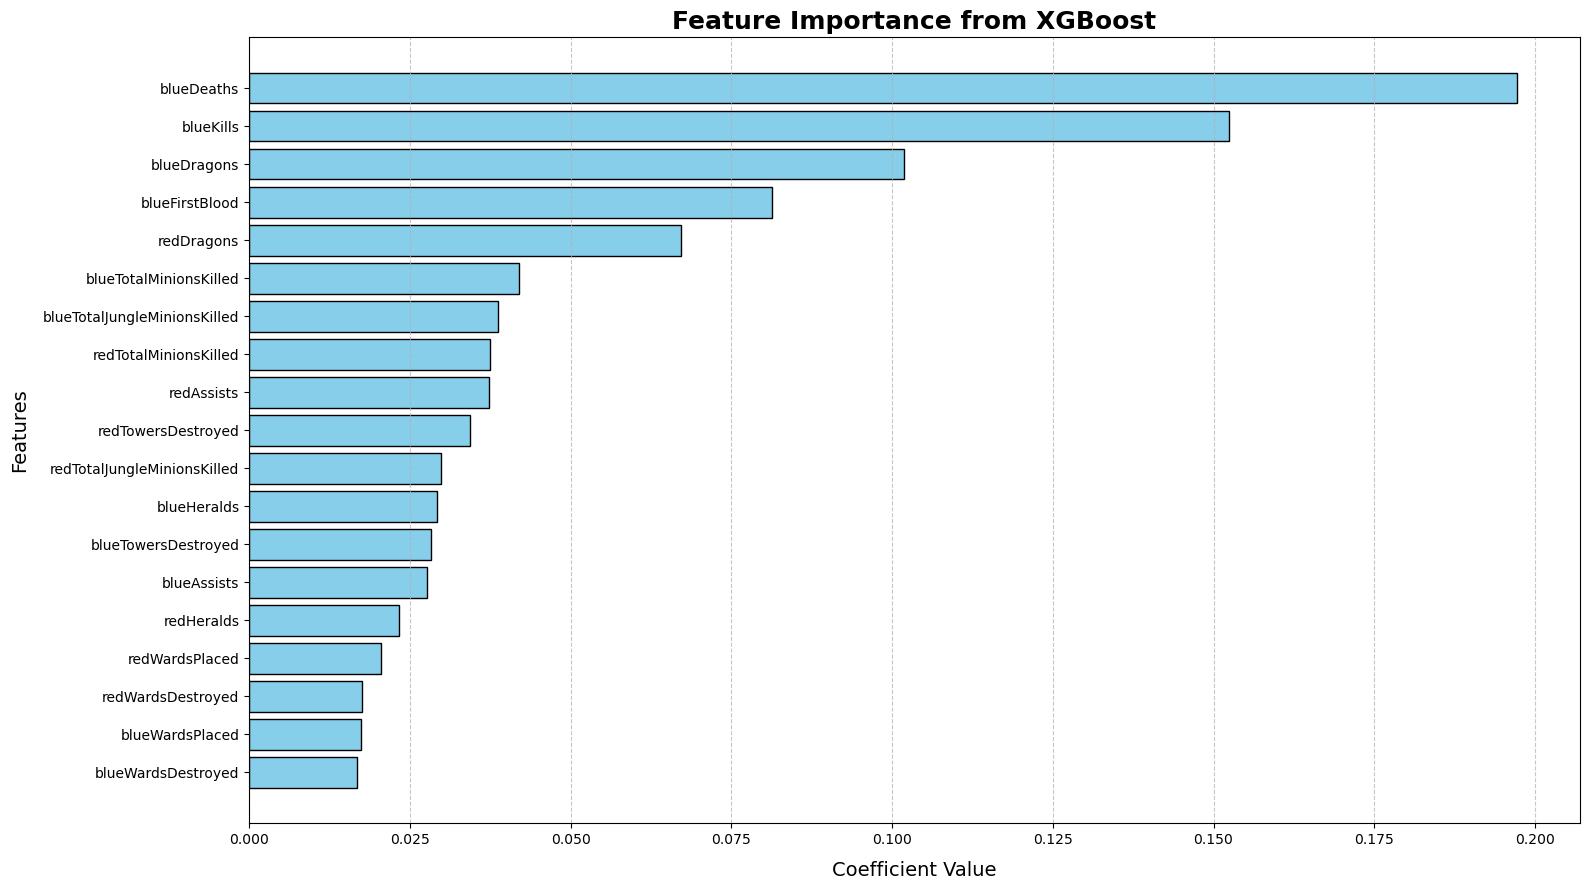

In [131]:
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(columns[indices], feature_importances[indices], color="skyblue", edgecolor="black")
ax.set_title("Feature Importance from XGBoost", fontsize=18, weight="bold")
ax.set_xlabel("Coefficient Value", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)
ax.grid(axis="x", linestyle="--", alpha=0.7)
fig.tight_layout()

plt.show()

# XGBoost Cross Validation

In [132]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation AUC scores:", cv_scores)
print("Mean AUC score:", np.mean(cv_scores))

c:\Users\Junbo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:26:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Junbo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:26:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Junbo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:26:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Junbo\anaconda3\Lib\site-packages\

Cross-Validation AUC scores: [0.79839982 0.78912246 0.78793411 0.81271129 0.78511907]
Mean AUC score: 0.7946573498476479


# XGBoost: ROC

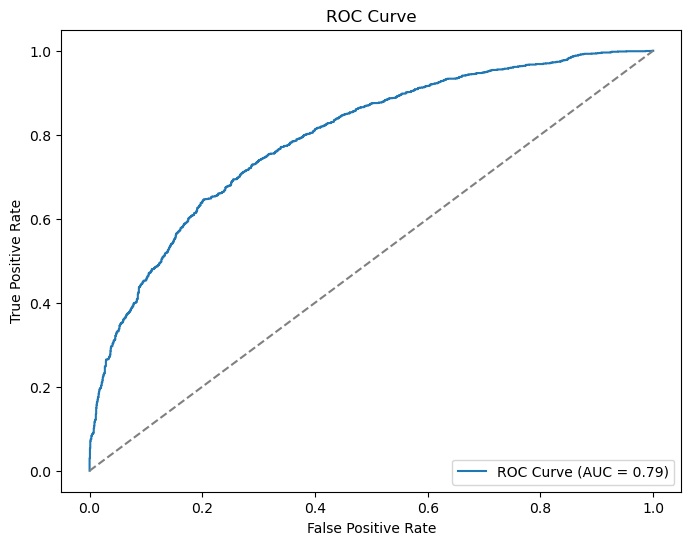

In [133]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

# Naive Bayes

In [134]:
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [135]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 70.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1624
           1       0.71      0.70      0.70      1637

    accuracy                           0.71      3261
   macro avg       0.71      0.71      0.71      3261
weighted avg       0.71      0.71      0.71      3261



# GridSearchCV - Naive Bayes

In [136]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Typical range for this parameter
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy after GridSearchCV: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'var_smoothing': 1e-09}
Accuracy after GridSearchCV: 70.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1624
           1       0.71      0.70      0.70      1637

    accuracy                           0.71      3261
   macro avg       0.71      0.71      0.71      3261
weighted avg       0.71      0.71      0.71      3261



# Naive Bayes: Feature Importance

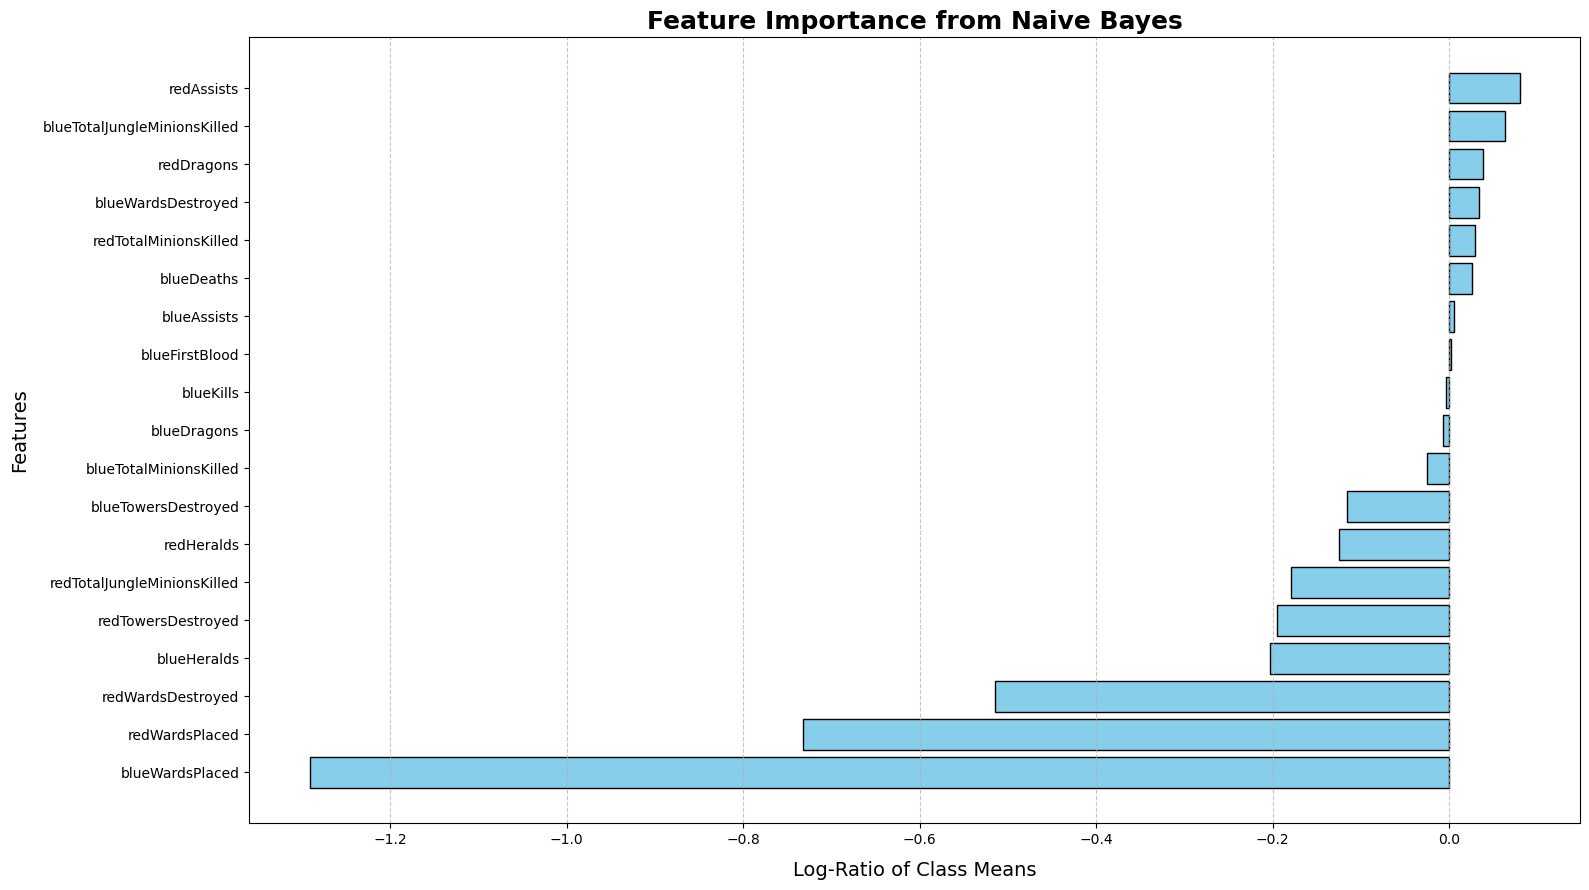

In [137]:
# Ensure the model is trained
if not hasattr(nb, "theta_"):
    raise AttributeError("The model does not have the required attributes. Ensure it's trained by calling fit().")

# Access the class-conditional means
blue_class_mean = nb.theta_[1]  # Mean values for the "blueWins=1" class
red_class_mean = nb.theta_[0]  # Mean values for the "blueWins=0" class

# Compute feature importance as the log ratio of class means
feature_importance = np.log(np.abs(blue_class_mean / red_class_mean))

# Sort features by importance
columns = df_select.drop(columns=['blueWins']).columns
indices = np.argsort(feature_importance)

# Plot the feature importance
fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(columns[indices], feature_importance[indices], color="skyblue", edgecolor="black")
ax.set_title("Feature Importance from Naive Bayes", fontsize=18, weight="bold")
ax.set_xlabel("Log-Ratio of Class Means", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)
ax.grid(axis="x", linestyle="--", alpha=0.7)
fig.tight_layout()

# Show the plot
plt.show()

# Naive Bayes - Cross Validation

In [138]:

# Define a stratified k-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.71255061 0.69736842 0.68977733 0.71912955 0.71341772]
Mean Accuracy: 0.7064487264900322
Standard Deviation: 0.011018082596902254


# Naive Bayes: ROC

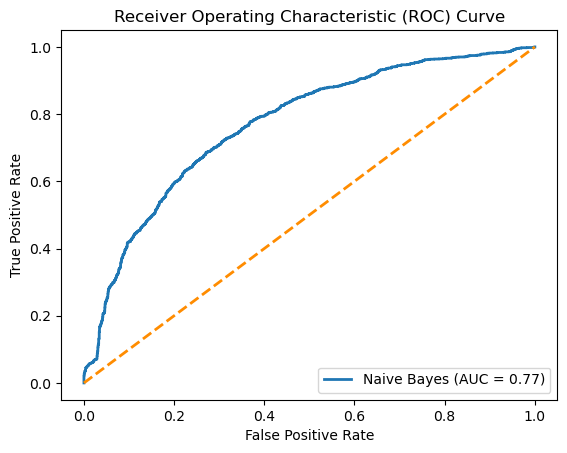

In [139]:
# Get predicted probabilities for the positive class (blueWins=1)
y_prob = nb.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.plot(fpr, tpr, lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()